# Tutorial 3: exercise

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This tutorial exercise was generated from an Jupyter notebook.  You can download the notebook [here](t3_exercise.ipynb). Use this downloaded Jupyter notebook to fill out your responses.*

### Exercise 1

What is an ROI, and why is it an important concept in digital image processing?

An ROI is a region of interest. In digital image processing, the images one obtains from scientific instrumentation frequently have an excess of unnecessary information. For example, the jellyfish image had a large area of background space. Isolating only an area with a single jellyfish sped up the computation time required for the analysis of many images, and also allowed us to focus on the frequency of a single jellyfish using total summed intensity of the ROI. 

## Exercise 2
How would you expect each of the following to be distributed?

**a)** The amount of time between repressor-operator binding events.

This distribution would likely be about half-normally. It is likely that lots of repressor-operator binding events occur very frequently, so times must be positive, and must be allowed to approach zero.

**b)** The number of times a repressor binds its operator in a given hour.

I would guess that this is normally distributed. I justify this by suggesting that there are many competing factors that contribute to this, such as a possibly variable repressor concentration. 

However, I worry about my interpretation of **a** and **b**. I don't really know how frequently repressors bind to operators; it seems to me that this might be very frequently if there is a moderate affinity and high concentration, or it could be considered a rare event if there is extremely low (never really binds) or extremely high affinity(never lets go of the DNA), or in the case of low concentration (never finds the DNA). If binding is rare, then a poisson and exponential distributions might be better choices, but the question is so general that it's really hard for me to guess. 

**c)** The amount of time (in total minutes of baseball played) between no-hitters in Major League Baseball.

This will be exponentially distributed. This is because the time between processes that are poisson distributed are exponentially distributed, and the occurances of no-hitters will have a poisson distribution because it is a rare event. 

**d)** The number of no-hitters in a Major League Baseball season.

This will fit a poisson distribution. A no-hitter is an exceedingly rare event, but having one no-hitter does not effect the probability of having another no-hitter. Thus, this situation perfectly fits the story of a Poisson distribution.

**e)** The winning times of the Belmont Stakes.

Is there a distribution for taking the min of N randomly distributed variables? It seems to me like the time of a given horse might be normally distributed, but I'm unsure as to whether the minimum of a set of horses would also be. Let's see:

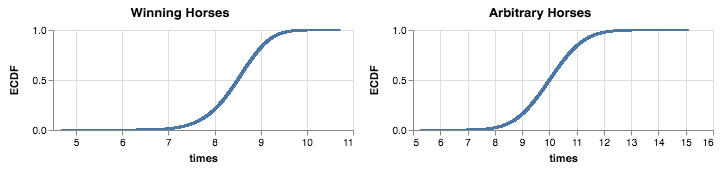

In [16]:
import numpy as np
import altair as alt
import altair_catplot as altcat
import pandas as pd
alt.data_transformers.enable('json')
winning_times = np.empty([100000])
rand_times = np.empty([100000])
for i in range(0, 100000):
    # Ten horses race. Std_dev of 1min, mean of ten min
    race = np.random.randn(10) + 10
    winning_times[i] = np.min(race)
    rand_times[i] = race[0]
df_win = pd.DataFrame(winning_times, columns = ["times"])
df_rand = pd.DataFrame(rand_times, columns = ["times"])
p1= altcat.catplot(data=df_win,
               height=100,
               width = 300,
               mark='line',
               encoding=dict(x=alt.X('times:Q')),
               title = "Winning Horses",
               transform='ecdf')
p2 = altcat.catplot(data=df_rand,
               height=100,
               width = 300,
               mark='line',
               encoding=dict(x=alt.X('times:Q')),
               title = "Arbitrary Horses",
               transform='ecdf')
p1 | p2

Meh. I guess it still looks normally distributed, just with a smaller mean and variance. Normal distribution it is!

### Exercise 3

Say I have three distributions:

- Exponential, β=1
- Gaussian, μ=1, σ=1
- Cauchy, µ=1, σ=1

Say I draw numbers out of each of these distributions. Rank order the distributions, lowest to highest, in terms of how likely I am do draw a number greater than 10. You do not need to calculate anything to answer this question.

Judging from the interactive plots:

Exponential: **very** unlikely. $e^{-10}$

Gaussian: **VERY** unlikely. ~$e^{-80}$

Cauchy: This one has a big ol' tail. Could happen. 

Cauchy $>$ Exponential $>$ Normal

<br />

### Exercise 4

This is not really an exercise, but a point of curiosity for me. Tell me of an instance, if any, where you were burned by a data set not being what you thought it was that you could have avoided if you did data validation.

Not sure that this has happened to me. That said, my scientific career is only a few years in, so it's probably a matter of time. 